### Logistic Regression

### Step 1:Import all the libraries

In [1]:
### Import the required packages
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Step 2:Load and Review the Data

In [2]:
df=pd.read_csv('h1n1_vaccine_prediction.csv')

In [3]:
pd. get_option("display.max_columns")

20

In [4]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


### Step 3:Explore the Data

In [5]:
df.shape

(26707, 34)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [7]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [8]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [9]:
df.describe(include="all")

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26707,26707,22284,25299,24665,25244,26707,26458.000000,26458.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,2,3,2,2,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21222,15858,12777,13555,18736,13560,11645,NaN,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000


In [10]:
df.drop(['unique_id',"qualification","race","housing_status"], axis=1,inplace=True)
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,sick_from_seas_vacc,age_bracket,sex,income_level,marital_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,55 - 64 Years,Female,Below Poverty,Not Married,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4.0,35 - 44 Years,Male,Below Poverty,Not Married,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,2.0,18 - 34 Years,Male,"<= $75,000, Above Poverty",Not Married,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,65+ Years,Female,Below Poverty,Not Married,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,4.0,45 - 54 Years,Female,"<= $75,000, Above Poverty",Married,Employed,"MSA, Not Principle City",1.0,0.0,0


<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

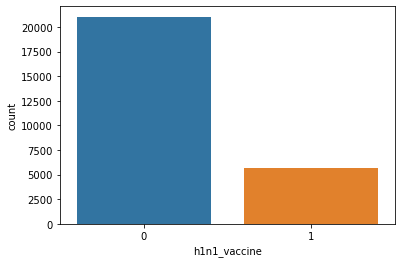

In [11]:
sns.countplot(x="h1n1_vaccine",data=df)

### Analyse the Data

In [12]:
df.drop("has_health_insur", axis=1,inplace=True)

### Data Wrangling

In [13]:
df.isnull().sum()

h1n1_worry                     92
h1n1_awareness                116
antiviral_medication           71
contact_avoidance             208
bought_face_mask               19
wash_hands_frequently          42
avoid_large_gatherings         87
reduced_outside_home_cont      82
avoid_touch_face              128
dr_recc_h1n1_vacc            2160
dr_recc_seasonal_vacc        2160
chronic_medic_condition       971
cont_child_undr_6_mnths       820
is_health_worker              804
is_h1n1_vacc_effective        391
is_h1n1_risky                 388
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
age_bracket                     0
sex                             0
income_level                 4423
marital_status               1408
employment                   1463
census_msa                      0
no_of_adults                  249
no_of_children                249
h1n1_vaccine                    0
dtype: int64

In [14]:
df.h1n1_worry=df["h1n1_worry"].interpolate(method='linear', limit_direction='forward', axis=0)

In [15]:
df.h1n1_awareness=df["h1n1_awareness"].interpolate(method='linear', limit_direction='forward', axis=0)

In [16]:
df.antiviral_medication=df["antiviral_medication"].interpolate(method='linear', limit_direction='forward', axis=0)

In [17]:
df.contact_avoidance=df["contact_avoidance"].interpolate(method='linear', limit_direction='forward', axis=0)

In [18]:
df.bought_face_mask=df["bought_face_mask"].interpolate(method='linear', limit_direction='forward', axis=0)

In [19]:
df.wash_hands_frequently=df["wash_hands_frequently"].interpolate(method='linear', limit_direction='forward', axis=0)

In [20]:
df.avoid_large_gatherings=df["avoid_large_gatherings"].interpolate(method='linear', limit_direction='forward', axis=0)

In [21]:
df.reduced_outside_home_cont=df["reduced_outside_home_cont"].interpolate(method='linear', limit_direction='forward', axis=0)

In [22]:
df.avoid_touch_face=df["avoid_touch_face"].interpolate(method='linear', limit_direction='forward', axis=0)

In [23]:
df.dr_recc_h1n1_vacc=df["dr_recc_h1n1_vacc"].interpolate(method='linear', limit_direction='forward', axis=0)

In [24]:
df.dr_recc_seasonal_vacc=df["dr_recc_seasonal_vacc"].interpolate(method='linear', limit_direction='forward', axis=0)

In [25]:
df.chronic_medic_condition=df["chronic_medic_condition"].interpolate(method='linear', limit_direction='forward', axis=0)

In [26]:
df.cont_child_undr_6_mnths=df["cont_child_undr_6_mnths"].interpolate(method='linear', limit_direction='forward', axis=0)

In [27]:
df.is_health_worker=df["is_health_worker"].interpolate(method='linear', limit_direction='forward', axis=0)

In [28]:
df.is_h1n1_vacc_effective=df["is_h1n1_vacc_effective"].interpolate(method='linear', limit_direction='forward', axis=0)

In [29]:
df.is_h1n1_risky=df["is_h1n1_risky"].interpolate(method='linear', limit_direction='forward', axis=0)

In [30]:
df.sick_from_h1n1_vacc=df["sick_from_h1n1_vacc"].interpolate(method='linear', limit_direction='forward', axis=0)

In [31]:
df.is_seas_vacc_effective=df["is_seas_vacc_effective"].interpolate(method='linear', limit_direction='forward', axis=0)

In [32]:
df.is_seas_risky=df["is_seas_risky"].interpolate(method='linear', limit_direction='forward', axis=0)

In [33]:
df.sick_from_seas_vacc=df["sick_from_seas_vacc"].interpolate(method='linear', limit_direction='forward', axis=0)

In [34]:
df.employment=df["employment"].interpolate(method='linear', limit_direction='forward', axis=0)

In [35]:
df.no_of_adults=df["no_of_adults"].interpolate(method='linear', limit_direction='forward', axis=0)

In [36]:
df.no_of_children=df["no_of_children"].interpolate(method='linear', limit_direction='forward', axis=0)

In [37]:
mode = df.filter(df.columns).mode()
cols=df.columns
df[cols]=df[cols].fillna(df.mode().iloc[0])

In [38]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
sex                          0
income_level                 0
marital_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

<AxesSubplot:>

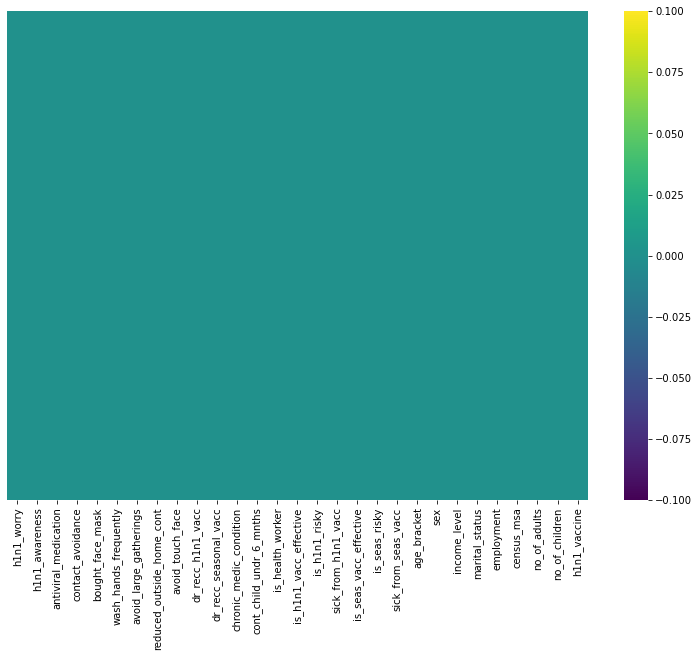

In [39]:
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

<AxesSubplot:>

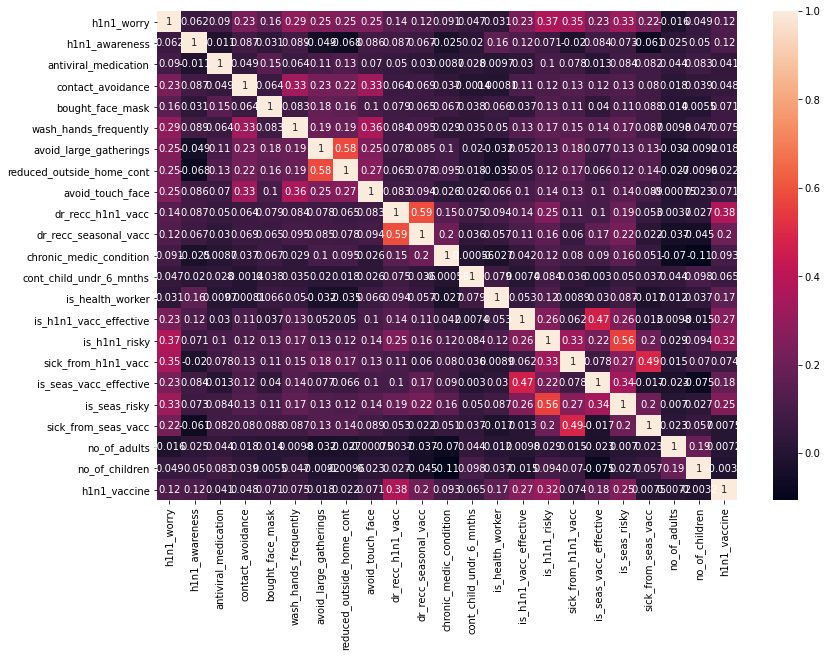

In [40]:
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(df.corr(),annot=True)

In [41]:
df.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
sex                           object
income_level                  object
marital_status                object
employment                    object
census_msa                    object
no_of_adults                 float64
n

In [42]:
df = pd.get_dummies(df, columns=['age_bracket'],drop_first=True)
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,marital_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Not Married,Not in Labor Force,Non-MSA,0.0,0.0,0,0,0,1,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Not Married,Employed,"MSA, Not Principle City",0.0,0.0,0,1,0,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Not Married,Employed,"MSA, Not Principle City",2.0,0.0,0,0,0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Not Married,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,0,0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Married,Employed,"MSA, Not Principle City",1.0,0.0,0,0,1,0,0


In [43]:
df = pd.get_dummies(df, columns=['sex'],drop_first=True)
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,sex_Male
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Not in Labor Force,Non-MSA,0.0,0.0,0,0,0,1,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Employed,"MSA, Not Principle City",0.0,0.0,0,1,0,0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Employed,"MSA, Not Principle City",2.0,0.0,0,0,0,0,0,1
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,0,0,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Employed,"MSA, Not Principle City",1.0,0.0,0,0,1,0,0,0


In [44]:
df = pd.get_dummies(df, columns=['income_level'],drop_first=True)
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,no_of_adults,no_of_children,h1n1_vaccine,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,sex_Male,"income_level_> $75,000",income_level_Below Poverty
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0,0,0,1,0,0,0,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0,1,0,0,0,1,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0,0,0,0,0,1,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,1,0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0,0,1,0,0,0,0,0


In [45]:
df = pd.get_dummies(df, columns=['marital_status'],drop_first=True)
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,no_of_children,h1n1_vaccine,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,sex_Male,"income_level_> $75,000",income_level_Below Poverty,marital_status_Not Married
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0,0,0,1,0,0,0,1,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0,1,0,0,0,1,0,1,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,1,0,0,1
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0,0,0,0,1,0,0,1,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0,0,1,0,0,0,0,0,0


In [46]:
df = pd.get_dummies(df, columns=['employment'],drop_first=True)
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,sex_Male,"income_level_> $75,000",income_level_Below Poverty,marital_status_Not Married,employment_Not in Labor Force,employment_Unemployed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,0,1,0,0,0,1,1,1,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,0,0,0,1,0,1,1,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,1,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,0


In [47]:
df = pd.get_dummies(df, columns=['census_msa'],drop_first=True)
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,age_bracket_55 - 64 Years,age_bracket_65+ Years,sex_Male,"income_level_> $75,000",income_level_Below Poverty,marital_status_Not Married,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,0,0,0,1,1,1,0,0,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,1,0,1,1,0,0,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,1,0,0,1,1,1,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0


### Step 4:Training Data and Testing Data Split

In [48]:
X=df.drop("h1n1_vaccine",axis=1)
y=df["h1n1_vaccine"]

In [49]:
X

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,age_bracket_55 - 64 Years,age_bracket_65+ Years,sex_Male,"income_level_> $75,000",income_level_Below Poverty,marital_status_Not Married,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1,0,0,0,1,1,1,0,0,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,1,0,1,1,0,0,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,1,0,0,1,1,1,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,1,1,0,0,1
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,1,0,0,1,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1,0,0,0,0,1,0,0,0,0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
y

0        0
1        0
2        0
3        0
4        0
        ..
26702    0
26703    0
26704    0
26705    0
26706    0
Name: h1n1_vaccine, Length: 26707, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=0)

### Step 5: Fit the model with the Training Data

In [54]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()    
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(X_test)

In [55]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

### Step 6:Predict the test data

In [56]:
y_pred=classifier.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8235734611352403

In [57]:
from sklearn import metrics

In [58]:
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.94      0.89      5230
           1       0.66      0.39      0.49      1447

    accuracy                           0.82      6677
   macro avg       0.75      0.67      0.69      6677
weighted avg       0.81      0.82      0.81      6677



In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[4938,  292],
       [ 886,  561]], dtype=int64)

<AxesSubplot:>

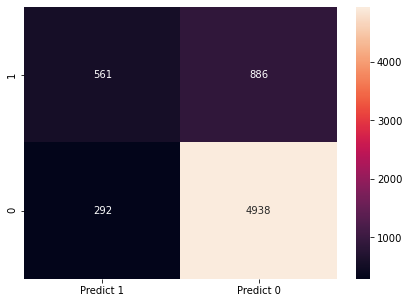

In [60]:

cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')